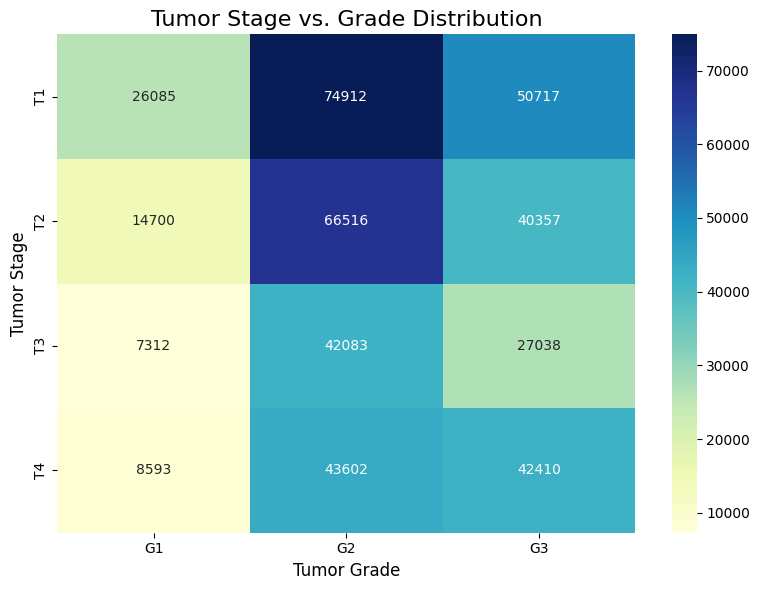

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tumor dataset
tumour_data_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"
columns_to_load = ["STAGE_BEST", "GRADE"]
tumour_data = pd.read_csv(tumour_data_path, usecols=columns_to_load, low_memory=False)

# Define mappings for stage and grade (if needed)
stage_mapping = {
    "1": "T1", "2": "T2", "3": "T3", "4": "T4",
    "1A": "T1", "2A": "T2", "3A": "T3", "4A": "T4",
    "1B": "T1", "2B": "T2", "3B": "T3", "4B": "T4"
}

# Map tumor stages
tumour_data["STAGE_BEST_MAPPED"] = tumour_data["STAGE_BEST"].map(stage_mapping).fillna("Other")

# Filter valid stages and grades (focus on G1, G2, G3)
valid_stages = ["T1", "T2", "T3", "T4"]
valid_grades = ["G1", "G2", "G3"]
tumour_data_filtered = tumour_data[
    (tumour_data["STAGE_BEST_MAPPED"].isin(valid_stages)) &
    (tumour_data["GRADE"].isin(valid_grades))
]

# Create a cross-tab (pivot table) for stage vs. grade
stage_grade_crosstab = pd.crosstab(
    tumour_data_filtered["STAGE_BEST_MAPPED"],
    tumour_data_filtered["GRADE"]
)

# Plot a heatmap of the cross-tab
plt.figure(figsize=(8, 6))
sns.heatmap(stage_grade_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Tumor Stage vs. Grade Distribution", fontsize=16)
plt.xlabel("Tumor Grade", fontsize=12)
plt.ylabel("Tumor Stage", fontsize=12)
plt.tight_layout()
plt.show()
